In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import hashlib
import json
from os import listdir
from os.path import isfile, join
import pandas as pd

In [2]:
def load_exp_result(exp_name):
    dir_path = './results'
    filenames = [f for f in listdir(dir_path) if isfile(join(dir_path, f)) if '.json' in f]
    list_result = []
    for filename in filenames:
        if exp_name in filename:
            with open(join(dir_path, filename), 'r') as infile:
                results = json.load(infile)
                list_result.append(results)
    df = pd.DataFrame(list_result) # .drop(columns=[])
    return df

In [14]:
adam_3222 =load_exp_result('Bottlenect_exp1-3b9bf6.json')

In [15]:
rmsprop_3222 =load_exp_result('Bottlenect_exp1-cf2149.json')

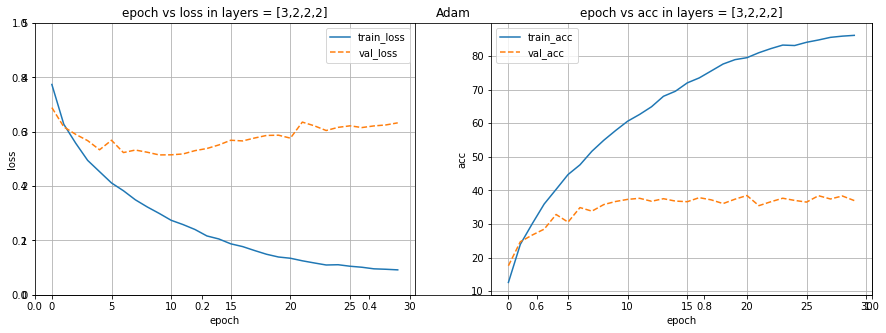

In [31]:
fig = plt.figure(figsize=(15,5))
plt.title('Adam')
###### loss fluctuation ####
ax1 = fig.add_subplot(1,2,1)
ax1.plot(list(range(30)), list(adam_3222['train_losses'])[0], label = 'train_loss')
ax1.plot(list(range(30)), list(adam_3222['val_losses'])[0],'--' ,label = 'val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0,5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss in layers = [3,2,2,2]')

########## metric fluctuation #######

ax2 = fig.add_subplot(1,2,2)
ax2.plot(list(range(30)), list(adam_3222['train_accs'])[0], label = 'train_acc')
ax2.plot(list(range(30)), list(adam_3222['val_accs'])[0],'--' ,label = 'val_acc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('acc')

ax2.grid()
ax2.legend()
ax2.set_title('epoch vs acc in layers = [3,2,2,2]')

plt.show()


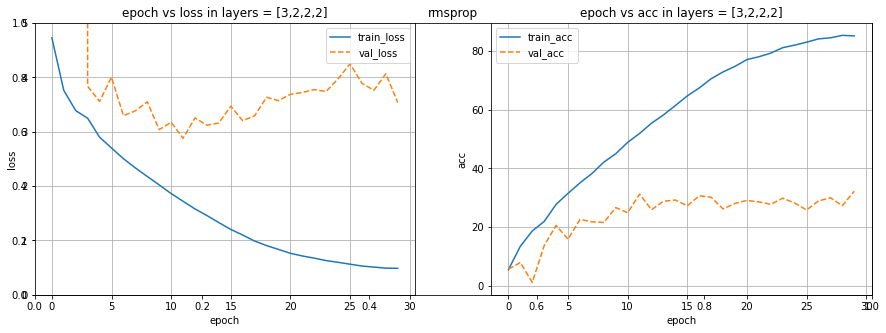

In [30]:
fig = plt.figure(figsize=(15,5))
plt.title('rmsprop')
###### loss fluctuation ####
ax1 = fig.add_subplot(1,2,1)
ax1.plot(list(range(30)), list(rmsprop_3222['train_losses'])[0], label = 'train_loss')
ax1.plot(list(range(30)), list(rmsprop_3222['val_losses'])[0],'--' ,label = 'val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0,5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss in layers = [3,2,2,2]')

########## metric fluctuation #######

ax2 = fig.add_subplot(1,2,2)
ax2.plot(list(range(30)), list(rmsprop_3222['train_accs'])[0], label = 'train_acc')
ax2.plot(list(range(30)), list(rmsprop_3222['val_accs'])[0],'--' ,label = 'val_acc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('acc')

ax2.grid()
ax2.legend()
ax2.set_title('epoch vs acc in layers = [3,2,2,2]')

plt.show()
